In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


In [ ]:
df_train = pd.read_csv("/content/traindata_nn_rf.csv")
df_test = pd.read_csv("/content/testdata_nn_rf.csv")

In [ ]:
df_test

,DATE,LOG_WATER_LEVEL,HUMIDITY,MEAN_TEMP,PRECIPITATION,PRESSURE,SNOW_DEPTH,SUNSHINE,WIND_SPEED,GLOBAL_RADIATION,...,annual_cos,half_annual_sin,half_annual_cos,quarter_annual_sin,quarter_annual_cos,month_sin,month_cos,weekly_sin,weekly_cos,time_index
0,2018-01-01,5.826000,-0.983710,0.083787,-0.251703,-0.493378,-0.214928,0.529667,2.772335,-0.753147,...,1.412586,0.047469,1.383865,0.094866,1.382567,0.715259,1.225321,1.105677e+00,0.881748,1.732156
1,2018-01-02,5.826000,-0.574024,-0.419449,0.178371,-0.850710,-0.214928,0.099218,2.861490,-0.722150,...,1.411958,0.097112,1.381299,0.193667,1.372312,0.715259,1.225321,1.378756e+00,-0.314692,1.732367
2,2018-01-03,5.826000,-0.492087,-0.657825,-0.382595,-0.111403,-0.214928,0.189839,2.861490,-0.722150,...,1.410911,0.146633,1.377026,0.291502,1.355275,0.715259,1.225321,6.136043e-01,-1.274162,1.732578
3,2018-01-04,5.837730,-0.000464,-0.459179,0.832831,-1.269651,-0.214928,-0.852299,3.753032,-1.156109,...,1.409445,0.195973,1.371050,0.387897,1.331541,0.715259,1.225321,-6.136043e-01,-1.274162,1.732788
4,2018-01-05,5.874931,0.655034,-0.287019,2.459633,-1.540730,-0.214928,-1.056195,3.753032,-1.156109,...,1.407562,0.245072,1.363380,0.482379,1.301224,0.715259,1.225321,-1.378756e+00,-0.314692,1.732999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2023-12-27,5.973810,-0.000464,-0.485665,-0.438692,0.381469,-0.214928,-0.195299,0.810943,-0.856471,...,1.409445,0.047469,1.383865,0.094866,1.382567,0.006798,1.414434,6.136043e-01,-1.274162,2.192884
2187,2023-12-28,5.963579,1.310531,-1.094846,-0.438692,0.812731,-0.214928,-0.897609,-0.882987,-0.970127,...,1.410911,0.097112,1.381299,0.193667,1.372312,0.006798,1.414434,-6.136043e-01,-1.274162,2.193095
2188,2023-12-29,5.955837,1.392468,-1.081602,-0.438692,0.701835,-0.214928,-1.056195,-0.793833,-1.145777,...,1.411958,0.146633,1.377026,0.291502,1.355275,0.006798,1.414434,-1.378756e+00,-0.314692,2.193306
2189,2023-12-30,5.942799,0.163411,-0.273776,-0.401294,0.319860,-0.214928,-0.920264,0.186864,-1.032121,...,1.412586,0.195973,1.371050,0.387897,1.331541,0.006798,1.414434,-1.105677e+00,0.881748,2.193517


In [ ]:
df_train

,DATE,LOG_WATER_LEVEL,HUMIDITY,MEAN_TEMP,PRECIPITATION,PRESSURE,SNOW_DEPTH,SUNSHINE,WIND_SPEED,GLOBAL_RADIATION,...,annual_cos,half_annual_sin,half_annual_cos,quarter_annual_sin,quarter_annual_cos,month_sin,month_cos,weekly_sin,weekly_cos,time_index
0,1973-01-01,5.638355,-0.164338,-1.598082,-0.438692,1.416499,-0.214928,0.642943,-1.150449,-0.608494,...,1.412586,0.047469,1.383865,0.094866,1.382567,0.715259,1.225321,1.105677e+00,0.881748,-1.731945
1,1973-01-02,5.634790,0.409222,-1.637811,-0.438692,1.071489,-0.214928,-0.535126,-0.882987,-0.887468,...,1.411958,0.097112,1.381299,0.193667,1.372312,0.715259,1.225321,1.378756e+00,-0.314692,-1.731735
2,1973-01-03,5.631212,0.409222,-1.425922,-0.438692,1.379533,-0.214928,-0.580437,-1.239604,-0.897800,...,1.410911,0.146633,1.377026,0.291502,1.355275,0.715259,1.225321,6.136043e-01,-1.274162,-1.731524
3,1973-01-04,5.627621,0.163411,-1.306734,-0.438692,1.490429,-0.214928,-0.806988,-0.793833,-0.980459,...,1.409445,0.195973,1.371050,0.387897,1.331541,0.715259,1.225321,-6.136043e-01,-1.274162,-1.731313
4,1973-01-05,5.620401,0.409222,-1.319978,-0.438692,1.909370,-0.214928,-0.874954,0.097709,-1.011456,...,1.407562,0.245072,1.363380,0.482379,1.301224,0.715259,1.225321,-1.378756e+00,-0.314692,-1.731102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,2017-12-27,5.826000,0.573097,-1.041873,-0.438692,-0.739814,-0.214928,-1.033540,0.097709,-1.114780,...,1.409445,0.047469,1.383865,0.094866,1.382567,0.006798,1.414434,6.136043e-01,-1.274162,1.731102
16432,2017-12-28,5.823046,0.736971,-1.015387,0.365360,-3.068632,-0.214928,-1.056195,0.276018,-1.218103,...,1.410911,0.097112,1.381299,0.193667,1.372312,0.006798,1.414434,-6.136043e-01,-1.274162,1.731313
16433,2017-12-29,5.820083,0.081474,-1.187547,-0.363897,-1.824131,-0.214928,-1.056195,2.861490,-1.187106,...,1.411958,0.146633,1.377026,0.291502,1.355275,0.006798,1.414434,-1.378756e+00,-0.314692,1.731524
16434,2017-12-30,5.817111,-0.819835,-1.240519,0.028780,-0.591953,-0.214928,-0.263264,0.810943,-0.815141,...,1.412586,0.195973,1.371050,0.387897,1.331541,0.006798,1.414434,-1.105677e+00,0.881748,1.731735


In [ ]:
X_train = df_train.drop(columns=['LOG_WATER_LEVEL', 'DATE'])
y_train = df_train["LOG_WATER_LEVEL"]
X_test = df_test.drop(columns=['LOG_WATER_LEVEL', 'DATE'])
y_test = df_test["LOG_WATER_LEVEL"]

# Basic Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
nnet = MLPRegressor(
    hidden_layer_sizes=(32, 64, 32),  # Three hidden layers
    activation="relu",               # ReLU activation
    solver="sgd",                    # Stochastic Gradient Descent optimizer
    alpha=0.001,                     # Regularization parameter
    batch_size=32,                   # Mini-batch size
    max_iter=1000                    # Maximum number of epochs
)

# Train the model
nnet.fit(X_train, y_train)

# Evaluate the model
y_pred = nnet.predict(X_test)

# Transform predictions and actual values back to the original scale
y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)

# Calculate Root Mean Squared Error (RMSE) on the original scale
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
print(f"Root Mean Squared Error (Original Scale): {rmse}")


Root Mean Squared Error (Original Scale): 20.390375593982096


# Neural Networks with CV



In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize an MLPRegressor
nnet = MLPRegressor(max_iter=1000, random_state=42)

# Define the parameter distribution (for hyperparamet tuning)
param_dist = {
    'hidden_layer_sizes': [(32,), (64, 32), (32, 64, 32)],  # Different architectures
    'alpha': [0.0001, 0.001, 0.01],                        # Regularization strengths
    'batch_size': [16, 32, 64],                            # Mini-batch sizes
    'learning_rate_init': [0.0001, 0.001, 0.01],           # Initial learning rates
    'solver': ['adam', 'sgd']                              # Optimization solvers
}

# Set up RandomizedSearchCV (same cv as in randomforest)
random_search = RandomizedSearchCV(
    estimator=nnet,
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try
    scoring='neg_mean_squared_error',  # Use negative MSE for scoring
    cv=3,  # Number of cross-validation folds
    verbose=4,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = random_search.best_params_
best_score = -random_search.best_score_  # Convert back to positive MSE

print("Best Parameters:", best_params)
print("Best Score (Mean Squared Error):", best_score)

# Train the best model on the training data
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Transform predictions and true values back to original scale
y_test_exp = np.exp(y_test)
y_pred_exp = np.exp(y_pred)

# Calculate and print the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))
print(f"Root Mean Squared Error (Original Scale): {rmse}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'solver': 'adam', 'learning_rate_init': 0.0001, 'hidden_layer_sizes': (32, 64, 32), 'batch_size': 32, 'alpha': 0.01}
Best Score (Mean Squared Error): 5.459510338007113e-05
Root Mean Squared Error (Original Scale): 1.9579898276428136


# Evaluate and Plot


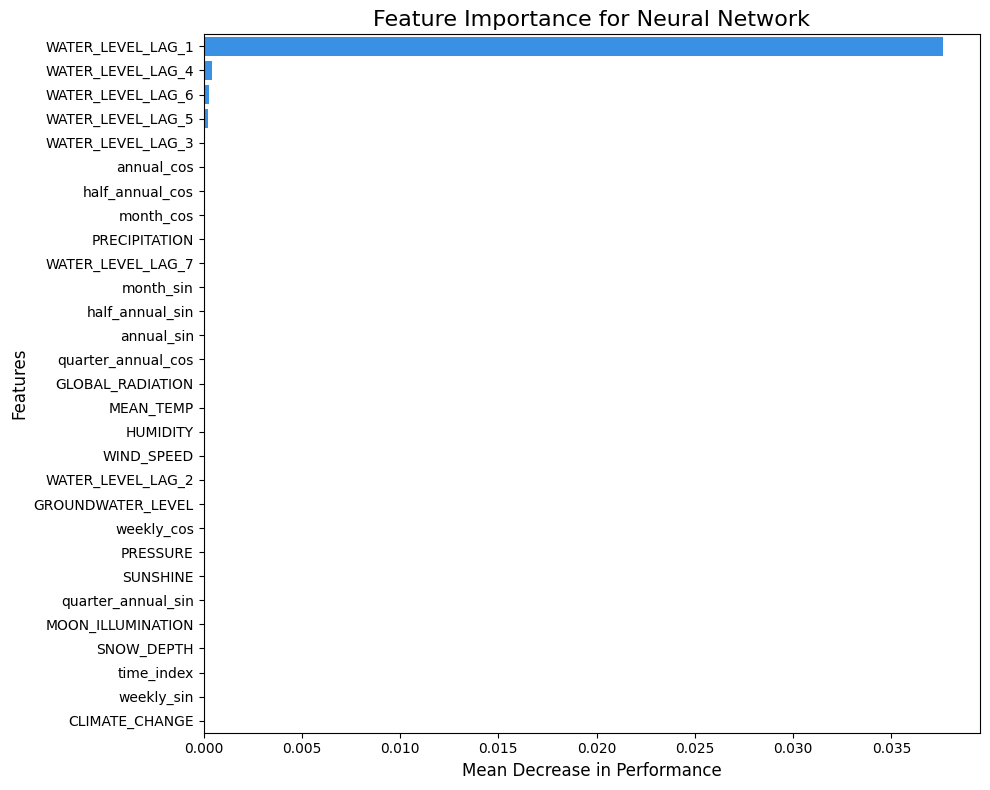

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Compute permutation importance
perm_importance = permutation_importance(best_model, X_test, y_test, scoring="neg_mean_squared_error", n_repeats=10, random_state=42)

# Extract feature importance
importances = perm_importance.importances_mean
indices = np.argsort(importances)[::-1]

# Create a DataFrame for visualization
feature_names = X_test.columns
data = {
    "Feature": feature_names[indices],
    "Importance": importances[indices]
}
importance_df = pd.DataFrame(data)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, color="dodgerblue")
plt.title("Feature Importance for Neural Network", fontsize=16)
plt.xlabel("Mean Decrease in Performance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


<ipython-input-20-db5b275399aa>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


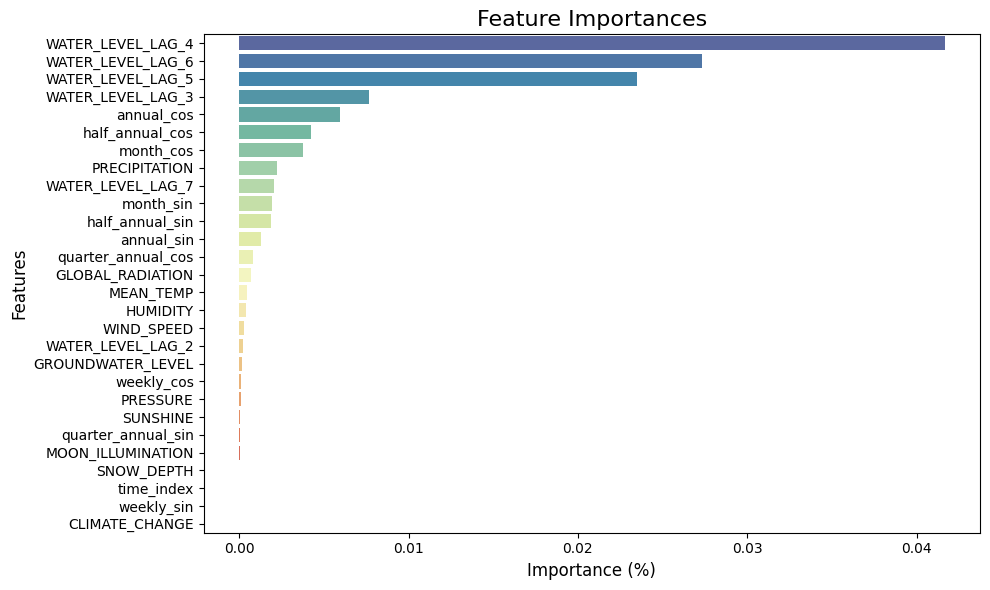

In [ ]:
# Compute permutation importance (if not already done)
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_model, X_test, y_test, scoring="neg_mean_squared_error", n_repeats=10, random_state=42)

# Extract feature importance
importances = perm_importance.importances_mean
indices = np.argsort(importances)[::-1]

# Create a DataFrame for feature importance
feature_names = X_test.columns
importance_df = pd.DataFrame({
    "Feature": feature_names[indices],
    "Importance (%)": importances[indices] * 100  # Scale to percentages
})

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Importance (%)",
    y="Feature",
    data=importance_df[1:],  # Exclude the most important feature for focus on others
    palette="Spectral_r"  # Color palette
)

# Add titles and labels
plt.title("Feature Importances", fontsize=16)
plt.xlabel("Importance (%)", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


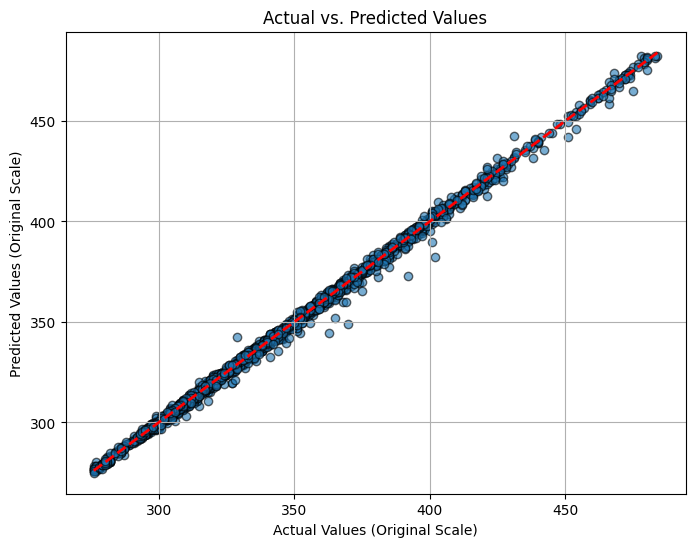

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_exp, y_pred_exp, alpha=0.6, edgecolor='k')
plt.plot([min(y_test_exp), max(y_test_exp)], [min(y_test_exp), max(y_test_exp)], color='red', linestyle='--', lw=2)
plt.xlabel('Actual Values (Original Scale)')
plt.ylabel('Predicted Values (Original Scale)')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

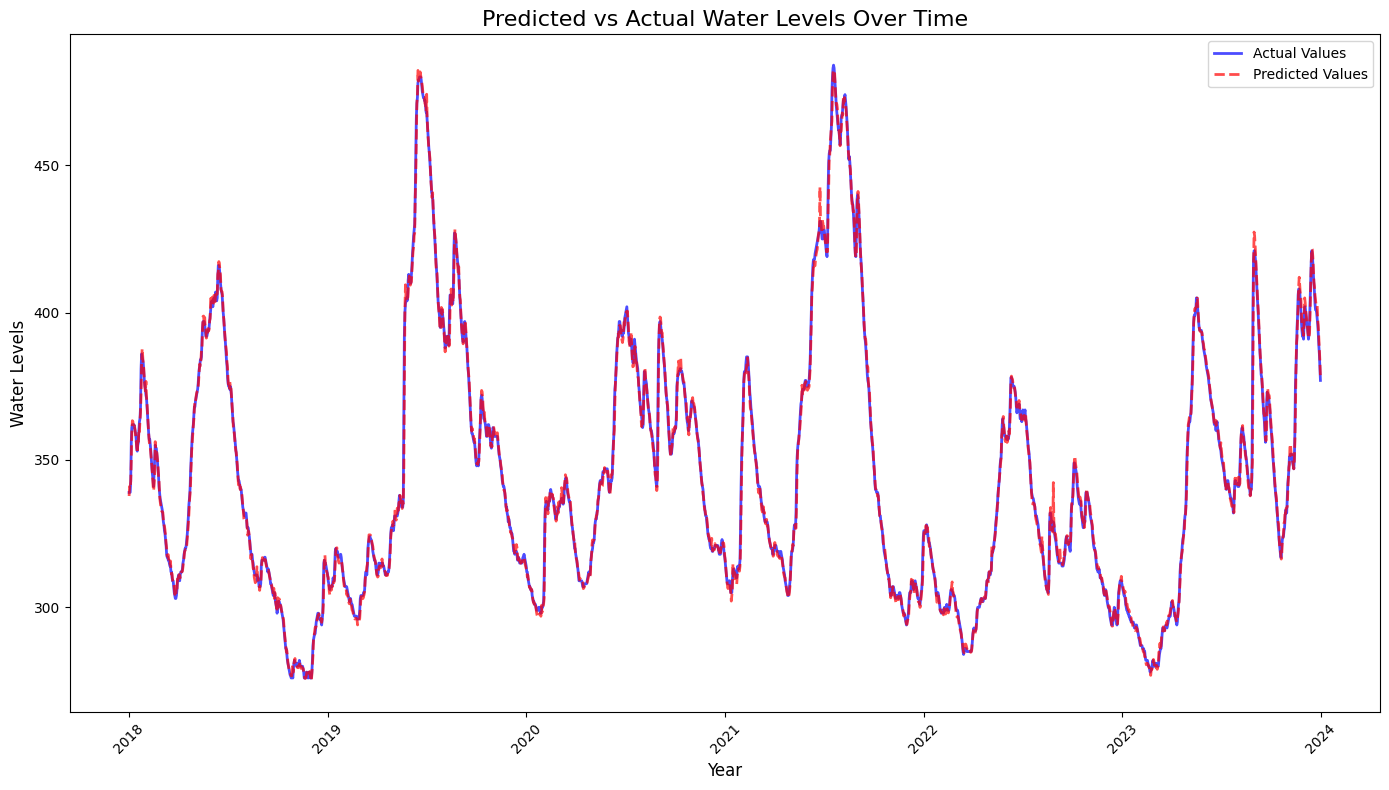

In [ ]:

dates = pd.to_datetime(df_test['DATE'])  # Convert to datetime

# Create a line plot for actual vs. predicted values
plt.figure(figsize=(14, 8))

# Plot actual values
plt.plot(dates, y_test_exp, label='Actual Values', color='blue', linewidth=2, alpha=0.7)

# Plot predicted values
plt.plot(dates, y_pred_exp, label='Predicted Values', color='red', linestyle='--', linewidth=2, alpha=0.7)

# Add labels, title, and legend
plt.title('Predicted vs Actual Water Levels Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Water Levels', fontsize=12)
plt.legend()

# Format the x-axis
plt.xticks(rotation=45)  # Rotate date labels
plt.tight_layout()
plt.show()
